In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

In [3]:
aging_data = pd.read_csv('1.xlsx_scaled.csv', header=None)

In [4]:
aging_data.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,6.00,27.82,9.42,129.89,445.95,377.26,5.00,5.00,5.50,2.00,...,11479.39,186.29,289423.61,0.07,0.07,73.95,19.07,25.75,9.60,0.0
1,0.00,0.00,0.00,17.00,59.24,35.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2,4.79,35.61,7.58,90.05,529.74,152.68,6.58,6.58,7.00,3.71,...,14708.61,279.63,594338.34,0.00,0.07,102.85,18.32,16.27,6.05,0.0
3,0.00,0.00,0.00,16.00,44.00,68.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
4,4.00,28.66,6.00,225.50,1038.03,441.71,6.74,6.00,7.74,2.74,...,37936.53,638.55,1667451.55,0.07,1.07,337.50,53.25,117.70,23.95,0.0


In [5]:
aging_data.shape

(4566, 83)

In [6]:
aging_value = aging_data.iloc[:, 82];
aging_value

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
4536    1.0
4537    1.0
4538    1.0
4539    1.0
4540    1.0
4541    1.0
4542    1.0
4543    1.0
4544    1.0
4545    1.0
4546    1.0
4547    1.0
4548    1.0
4549    1.0
4550    1.0
4551    1.0
4552    1.0
4553    1.0
4554    1.0
4555    1.0
4556    1.0
4557    1.0
4558    1.0
4559    1.0
4560    1.0
4561    1.0
4562    1.0
4563    1.0
4564    1.0
4565    1.0
Name: 82, Length: 4566, dtype: float64

In [7]:
aging_value_rows = aging_value[aging_value > 0]

In [8]:
non_aging_value_rows = aging_value[aging_value == 0]
p = []

RanksumsResult(statistic=35.454908100942916, pvalue=2.437076988738726e-275)
RanksumsResult(statistic=27.882027969782566, pvalue=4.407259892917474e-171)
RanksumsResult(statistic=32.76168036320253, pvalue=2.070243675712311e-235)
RanksumsResult(statistic=56.26489782109931, pvalue=0.0)
RanksumsResult(statistic=54.5206572828265, pvalue=0.0)
RanksumsResult(statistic=51.5863770070299, pvalue=0.0)
RanksumsResult(statistic=33.389447542578715, pvalue=1.9507869504156836e-244)
RanksumsResult(statistic=33.65776892447521, pvalue=2.4000330928836732e-248)
RanksumsResult(statistic=31.559370207268934, pvalue=1.3337078565926552e-218)
RanksumsResult(statistic=18.182391320040665, pvalue=7.11619082485601e-74)
RanksumsResult(statistic=29.188507578986638, pvalue=2.713361602796575e-187)
RanksumsResult(statistic=35.68569974016421, pvalue=6.5885471287771445e-279)
RanksumsResult(statistic=28.072348558347535, pvalue=2.1318772855866593e-173)
RanksumsResult(statistic=33.085909049473095, pvalue=4.7394601338664725e-24

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


RanksumsResult(statistic=56.04055011615728, pvalue=0.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=54.87392857881909, pvalue=0.0)
RanksumsResult(statistic=56.09055235183641, pvalue=0.0)
RanksumsResult(statistic=54.57991004436994, pvalue=0.0)
RanksumsResult(statistic=53.06704491636811, pvalue=0.0)
RanksumsResult(statistic=54.4121207730497, pvalue=0.0)
RanksumsResult(statistic=51.65119804627807, pvalue=0.0)
RanksumsResult(statistic=54.01515645926115, pvalue=0.0)
Ranksum

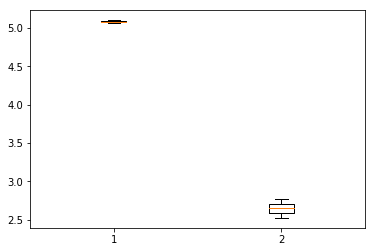

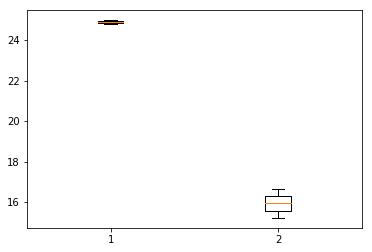

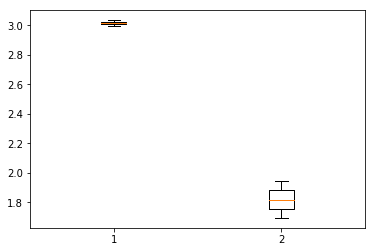

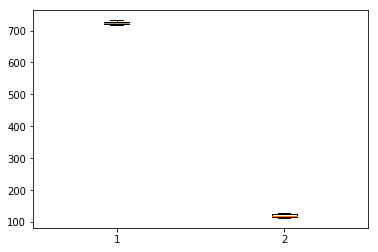

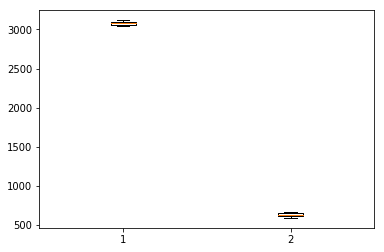

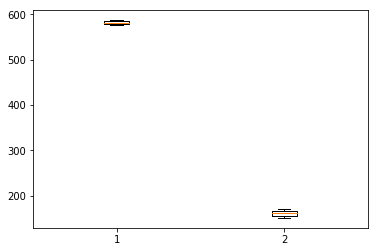

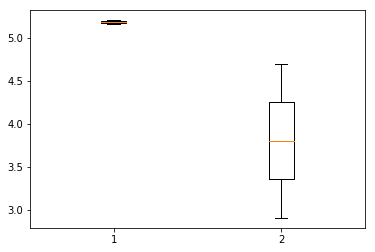

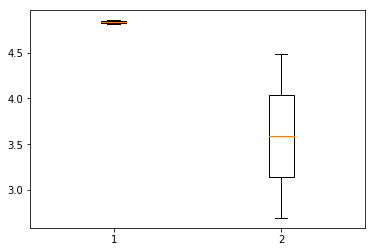

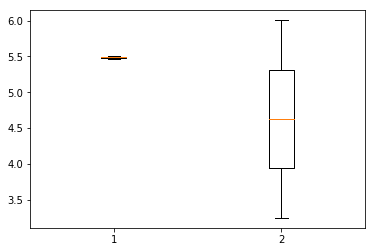

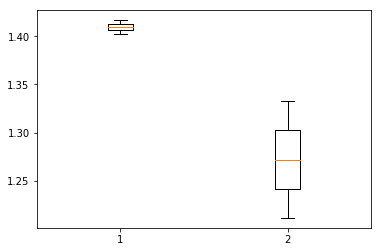

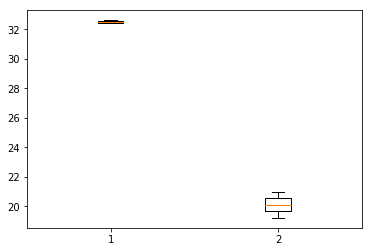

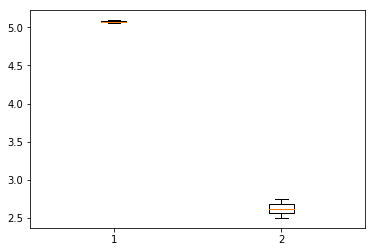

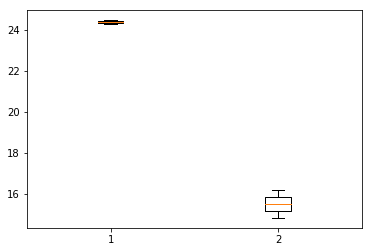

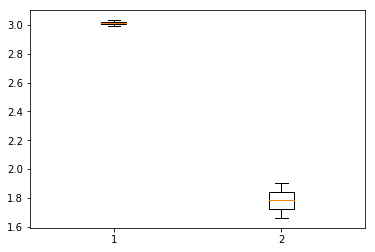

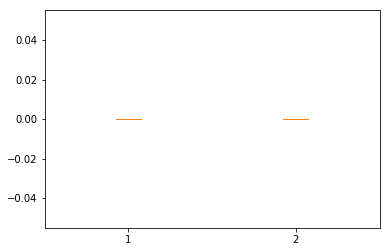

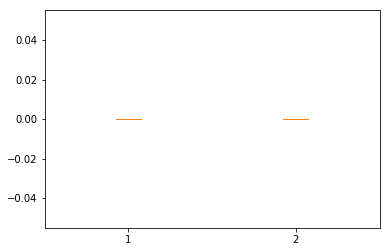

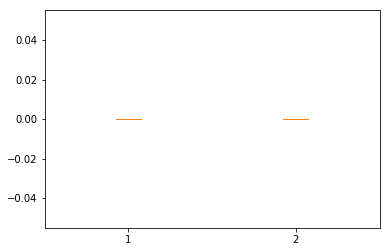

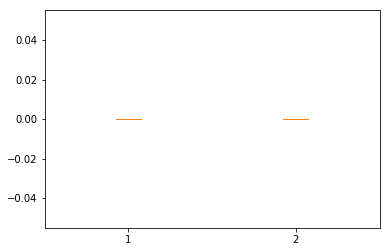

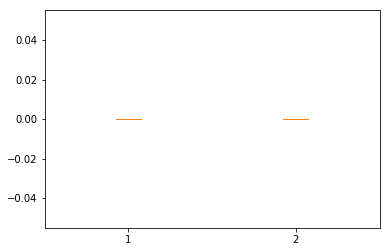

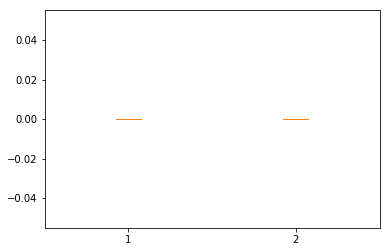

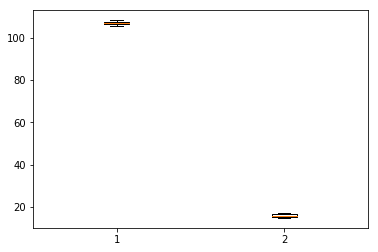

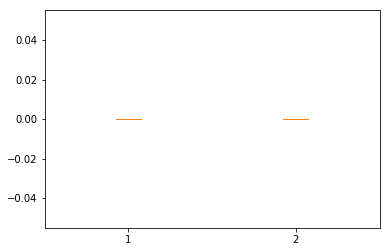

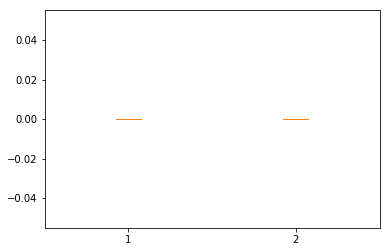

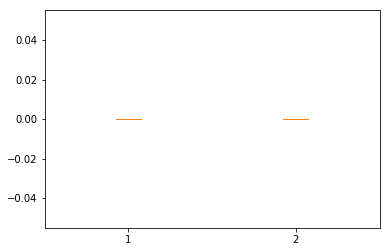

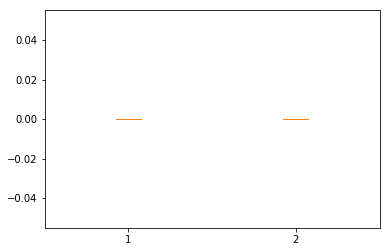

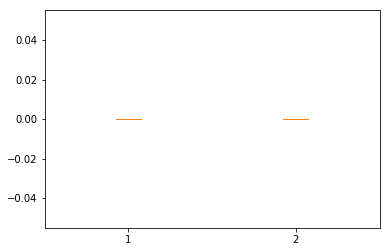

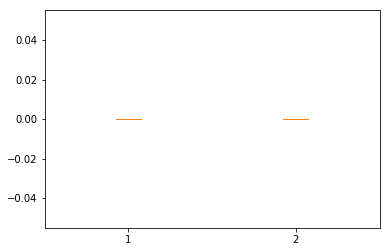

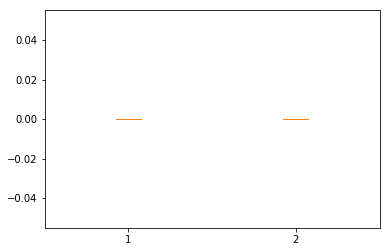

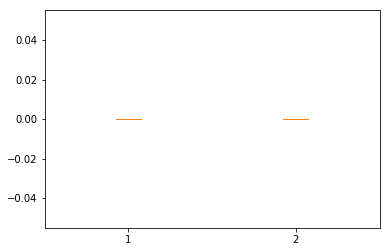

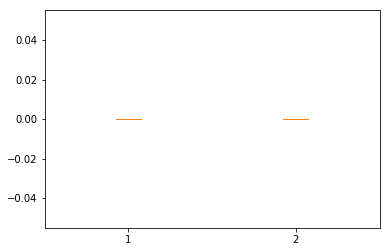

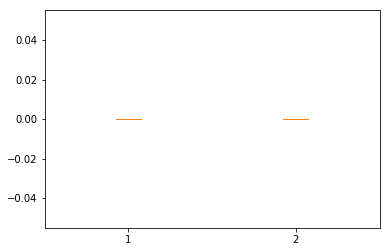

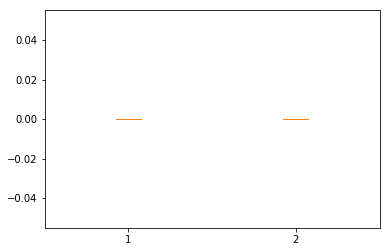

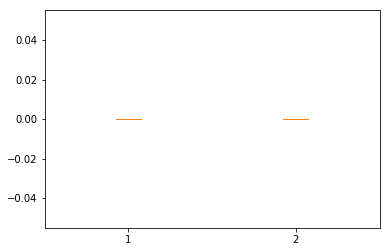

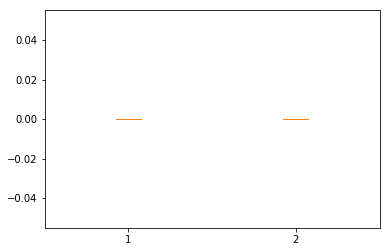

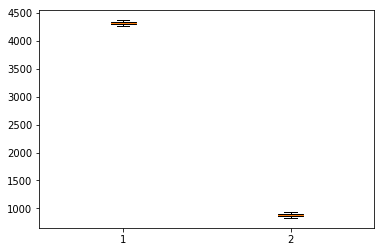

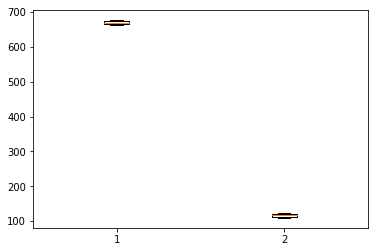

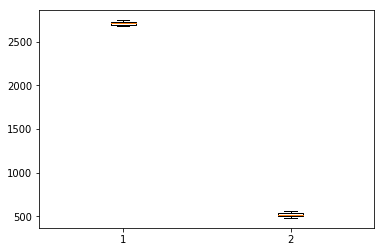

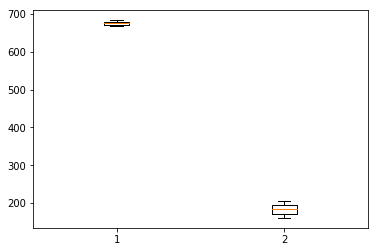

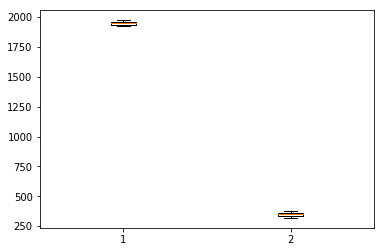

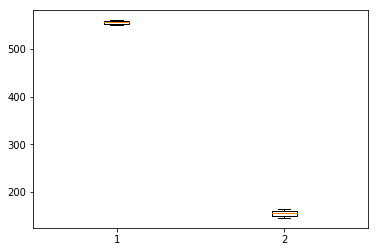

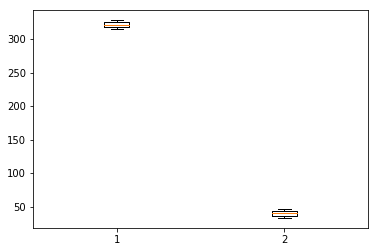

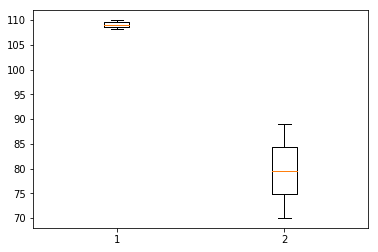

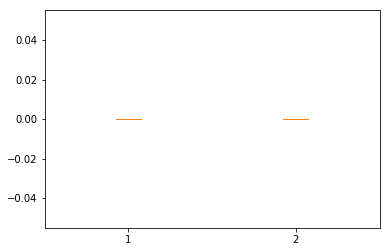

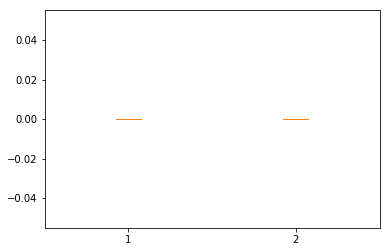

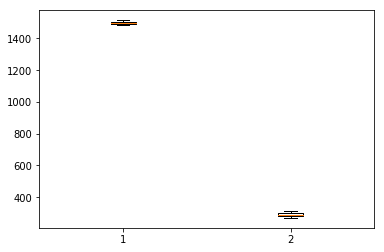

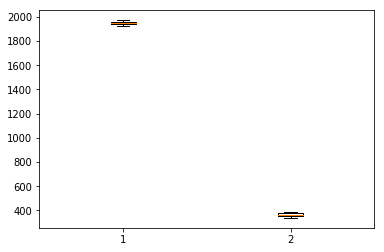

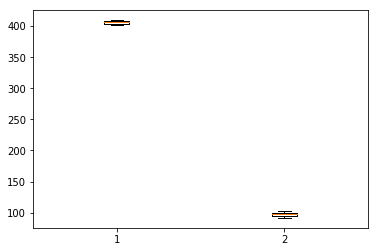

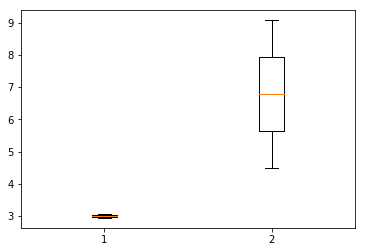

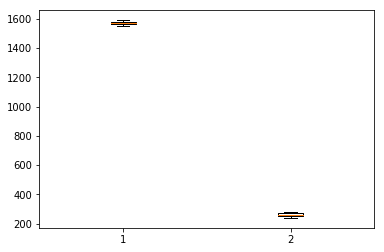

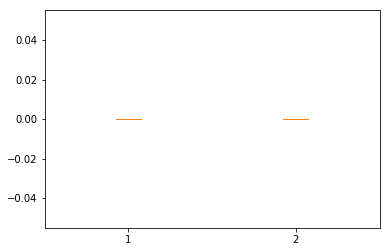

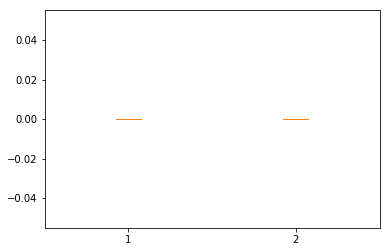

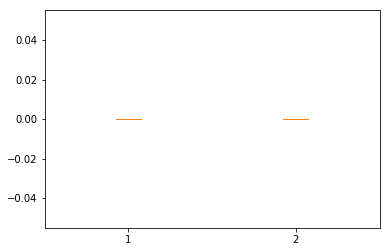

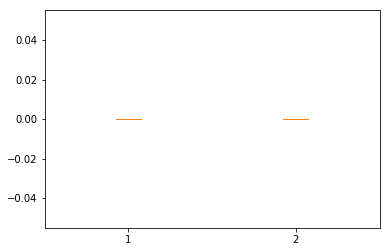

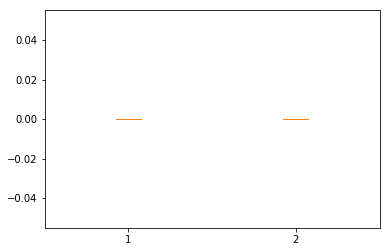

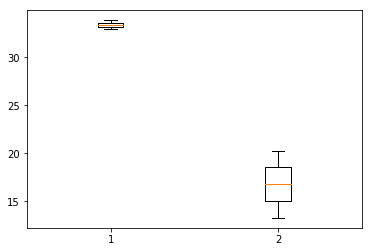

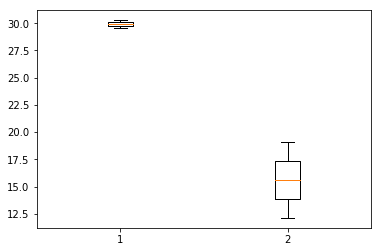

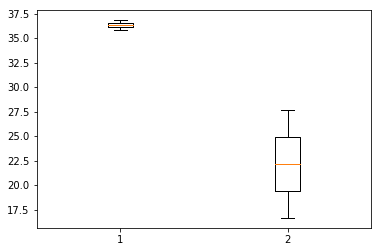

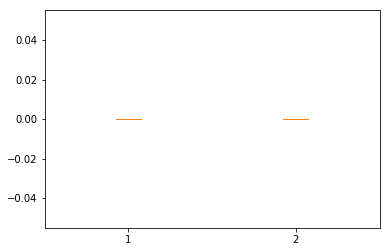

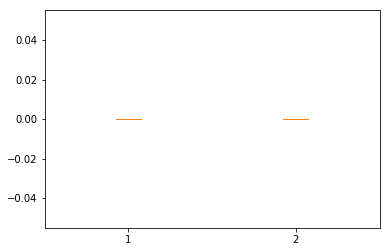

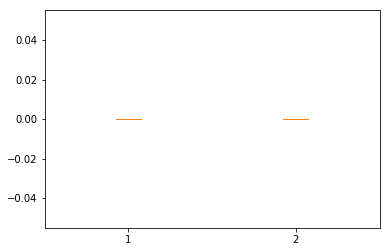

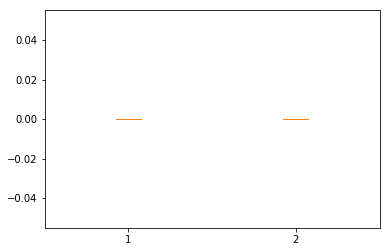

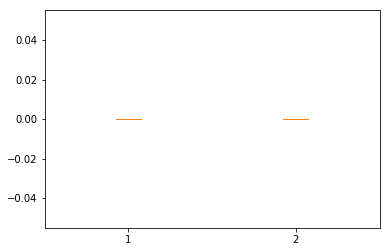

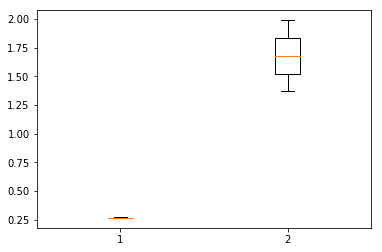

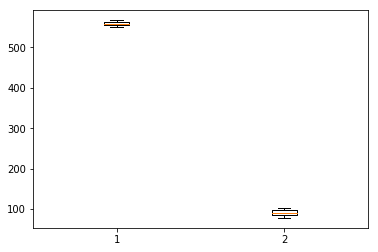

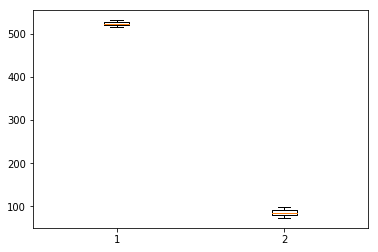

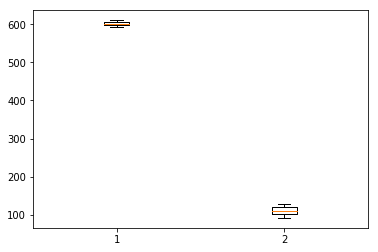

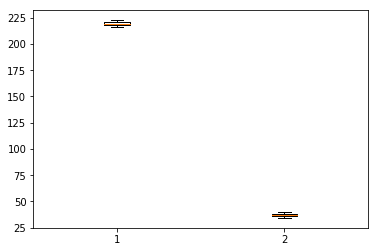

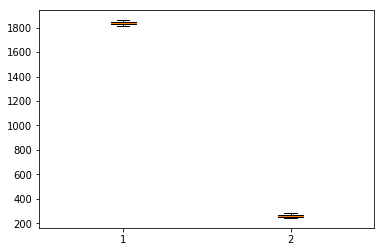

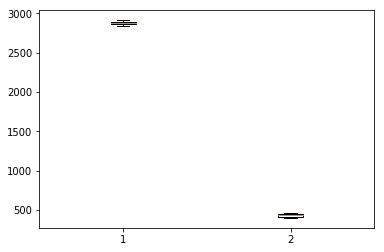

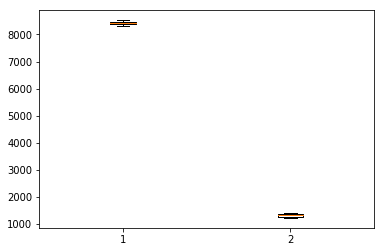

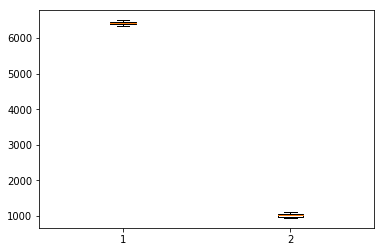

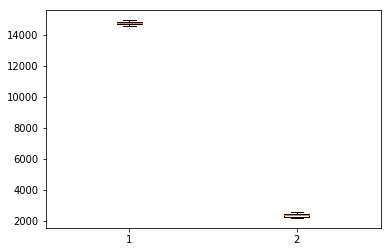

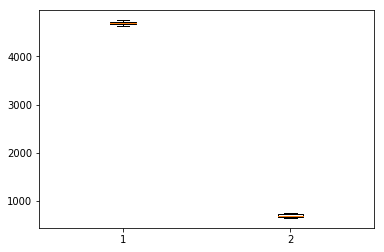

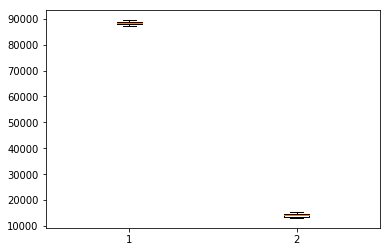

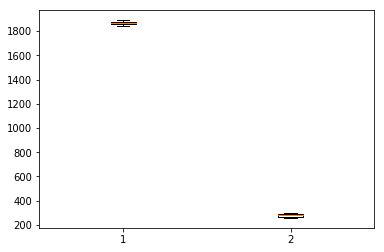

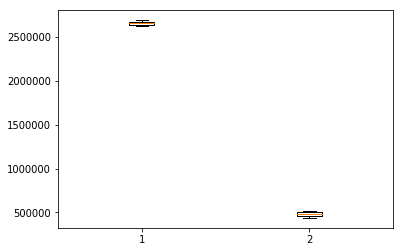

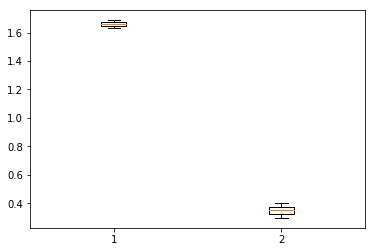

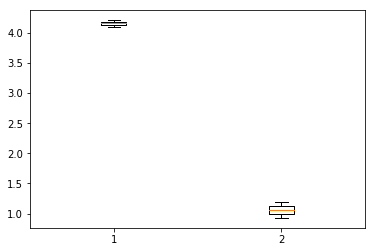

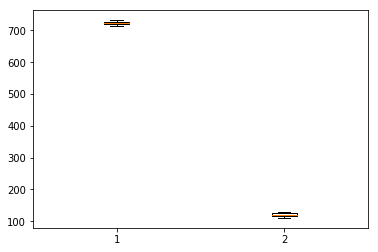

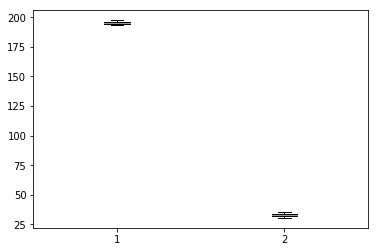

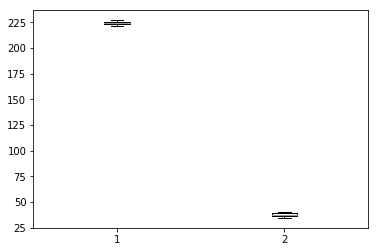

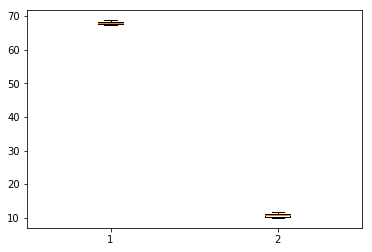

In [9]:
from pylab import plot, show, savefig, xlim, figure, hold, ylim, legend, boxplot, setp, axes
from scipy.stats import ranksums
for i in range(0,82):
    feature_column = aging_data.iloc[:, i]
    feature_column_aging_value = feature_column.iloc[aging_value_rows.index]
    feature_column_non_aging_value = feature_column.iloc[non_aging_value_rows.index]
    confidance_interval_aging = mean_confidence_interval(feature_column_aging_value)
    confidance_interval_non_aging = mean_confidence_interval(feature_column_non_aging_value)
    pair = [confidance_interval_aging, confidance_interval_non_aging]
    fig = plt.figure()
    plt.boxplot(pair)
    index = str(i+1)
    fig.savefig("box_plots1/box"+index)
    p.append(ranksums(feature_column_aging_value, feature_column_non_aging_value) )
    print(p[i])

results = pd.DataFrame(np.zeros((7, 8)) )

In [16]:
results = pd.DataFrame(np.zeros((7, 82)) )

result_array = [[],[],[],[],[],[],[]]

In [17]:
for i in range(0, 82):
    if (p[i][1] <= 0.05):
        result_array[0].append(1)
           
    else:
        result_array[0].append(0)

In [18]:
result_array

[[1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [],
 [],
 [],
 [],
 [],
 []]

In [19]:
result_array

[[1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [],
 [],
 [],
 [],
 [],
 []]

In [20]:
%store result_array

Stored 'result_array' (list)
